## <center>Sprawozdanie 4</center>
<center>Adrian Janakiewicz</center>

***Imports***

In [236]:
import matplotlib.pyplot as plt
from numpy import linspace, polyfit, poly1d, array, arange
from math import pi, cos
from scipy.interpolate import interp1d
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

<a id='zad1'></a>
***Zadanie 1.***  

In [237]:
def lagrange_interpolation(x, y):
    assert len(x) == len(y) != 0
    def f(n):
        sum = 0
        for i in range(len(x)):
            prod = 1
            for j in range(len(x)):
                if(i != j):
                    prod *= (n - x[j])/(x[i] - x[j])
            sum += y[i] * prod
        return sum
    return f

***Example:***

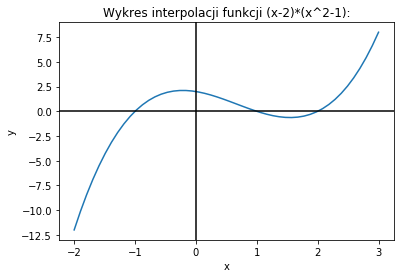

In [238]:
z= [-9, -2, -1, 0,  5]
y = lagrange_interpolation(z, [(x-2)*(x*x-1) for x in z])

plt.plot(linspace(-2, 3), y(linspace(-2, 3)))
plt.title('Wykres interpolacji funkcji (x-2)*(x^2-1):')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<a id='zad2'></a>
***Zadanie 2.***   

In [239]:
# Inicjalizacjia 
f = lambda x: 1/(25*x**2 +1)
start = -2
end = 2
n = 21
x = arange(-2,2,0.05)

rownoodlegle_X = linspace(start, end, n)
czebyszew_X   = array([(start + end) / 2 + (end - start) / 2 * cos(pi * (2 * k + 1) / (2 * n)) for k in range(1, n)])

In [240]:
# Przygotowanie funkcji interpolujących
wielomian_rownoodlegle = poly1d(polyfit(rownoodlegle_X, f(rownoodlegle_X), deg=(n - 1)))
wielomian_czebyszew  = poly1d(polyfit(czebyszew_X, f(czebyszew_X), deg=(n - 1)))

spline_rownoodlegle = interp1d(rownoodlegle_X, f(rownoodlegle_X), 3, fill_value='extrapolate')
spline_czebyszew  = interp1d(czebyszew_X, f(czebyszew_X), 3, fill_value='extrapolate')

C:\Users\adrja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


In [241]:
# Obliczenie wartości funkcji interpolujących
rownoodlegle_Y_wiel = wielomian_rownoodlegle(x)
czebyszew_Y_wiel = wielomian_czebyszew(x)

rownoodlegle_Y_spline = spline_rownoodlegle(x)
czebyszew_Y_spline = spline_czebyszew(x)

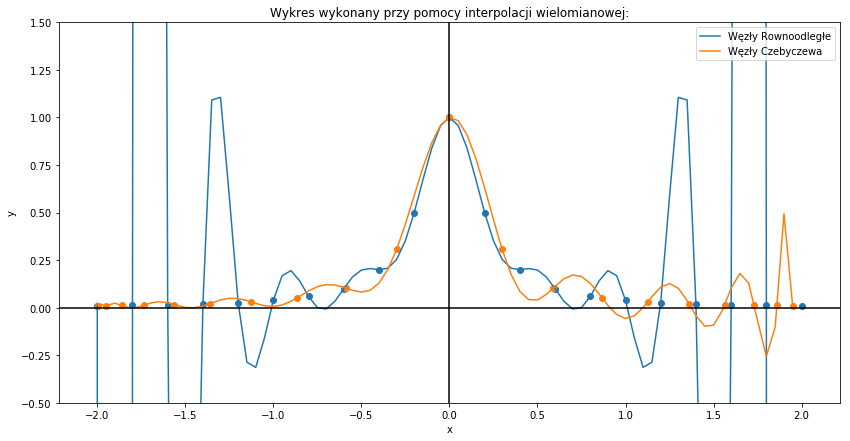

In [242]:
plt.figure(figsize=(14,7))
plt.plot(x, rownoodlegle_Y_wiel, label='Węzły Rownoodległe')
plt.plot(x, czebyszew_Y_wiel, label='Węzły Czebyczewa')
plt.scatter(rownoodlegle_X, wielomian_rownoodlegle(rownoodlegle_X))
plt.scatter(czebyszew_X, wielomian_czebyszew(czebyszew_X))
plt.title('Wykres wykonany przy pomocy interpolacji wielomianowej:')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()
plt.ylim(-0.5,1.5)
plt.show()

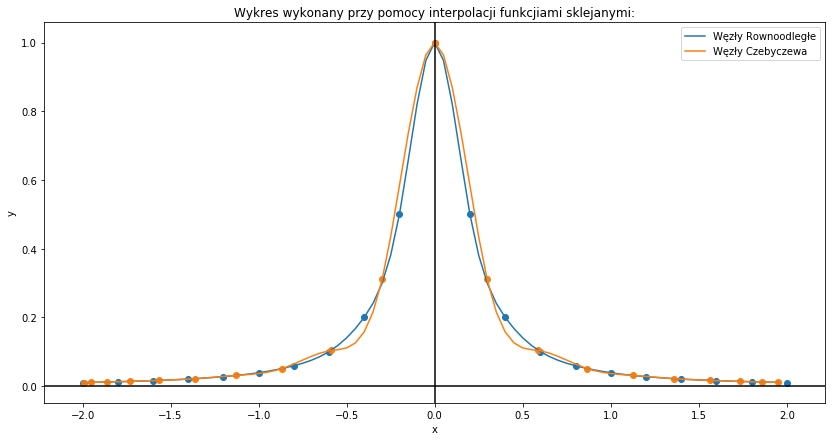

In [243]:
plt.figure(figsize=(14,7))
plt.plot(x, rownoodlegle_Y_spline, label='Węzły Rownoodległe')
plt.plot(x, czebyszew_Y_spline, label='Węzły Czebyczewa')
plt.scatter(rownoodlegle_X, wielomian_rownoodlegle(rownoodlegle_X))
plt.scatter(czebyszew_X, wielomian_czebyszew(czebyszew_X))
plt.title('Wykres wykonany przy pomocy interpolacji funkcjiami sklejanymi:')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()
plt.show()

Mamy tu do czynienia w pierwszym przypadku z efektem Rungego, który występuje na krańcach badanego przedziału podczas interpolowania wielomianami przy wykorzystaniu równoodległych węzłów. Efekt ten nie występuje w przypadku funkcji sklejanych, gdyż finalna funkcja składa się z lokalnie interpolujących funkcji.

<a id='zad3'></a>
***Zadanie 3.***  

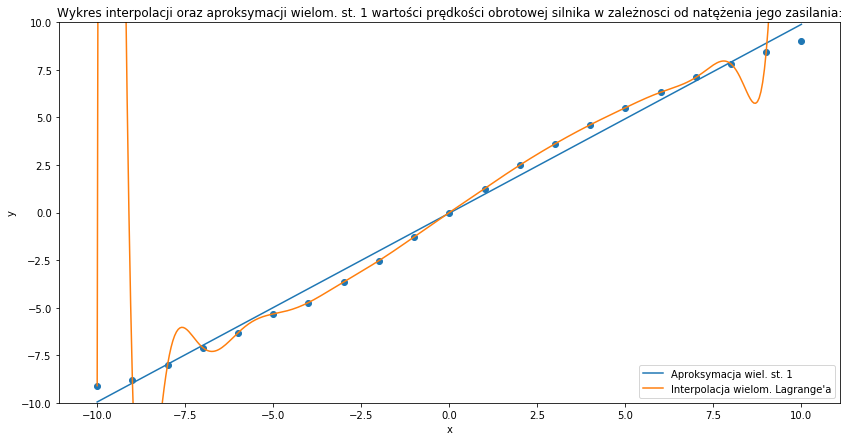

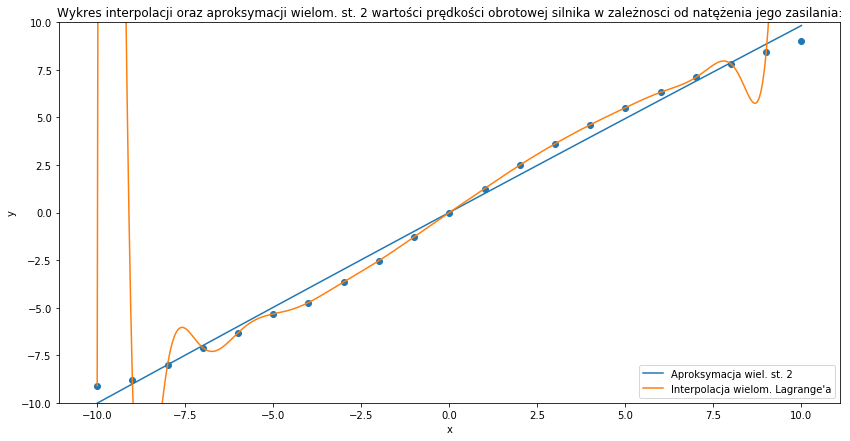

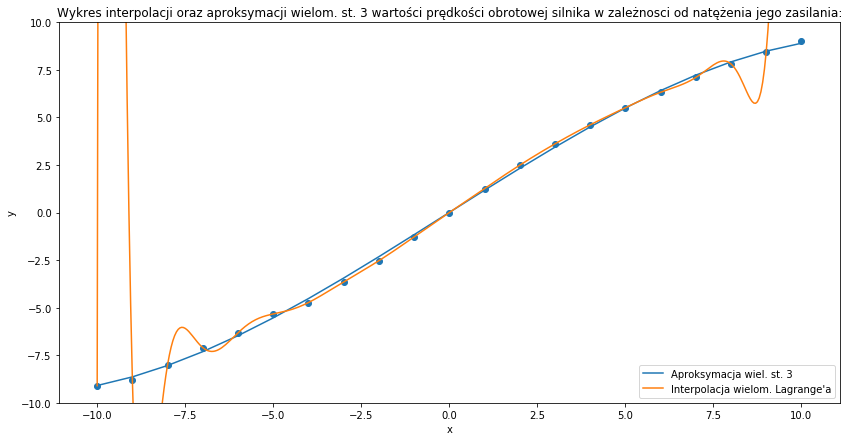

In [244]:
napiecie = array([x for x in range(-10, 11)]).reshape(-1, 1)
predkosc = array([-9.1, -8.82, -7.99, -7.1, -6.32, -5.33, -4.73, -3.65, -2.53, -1.28, 
                  0.0, 1.26, 2.49, 3.61, 4.61, 5.51, 6.32, 7.1, 7.81, 8.45, 9.02]).reshape(-1, 1)

x1 = arange(-10,10,0.05)                        
V = lagrange_interpolation(napiecie, predkosc)  # <- wielomian Lagrange'a
V_= []                                          # <- lista regresji wielomianowych
X_ = []                                         # <- lista wartości dopasowanych do regresji
regressor = []                                  # <- lista regresorów liniowych


for i in range(0, 3):
    V_.append(PolynomialFeatures(degree = i+1)) # <- dodajemy nową regresję wielomianową
    X_.append(V_[i].fit_transform(napiecie))    # <- dopasowujemy wartości do wielomianu
    V_[i].fit(napiecie, predkosc)               # <- obliczamy ilość wartości wyjściowych 

    regressor.append(LinearRegression())        # <- tworzymy nowy regresor liniowy 
    regressor[i].fit(X_[i],predkosc)            # <- dopasowujemy go do dopasowanych wartości oraz predkości 
    
    plt.figure(figsize=(14,7))
    plt.plot(napiecie,regressor[i].predict(V_[i].fit_transform(napiecie)), label='Aproksymacja wiel. st. {}'.format(i+1))
    
    plt.plot(x1, V(x1), label='Interpolacja wielom. Lagrange\'a')
    plt.scatter(napiecie,predkosc)
    plt.title('Wykres interpolacji oraz aproksymacji wielom. st. {0} wartości prędkości obrotowej silnika w zależnosci od natężenia jego zasilania:'.format(i+1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-10,10)
    plt.legend()
    plt.show()

<a id='zad4'></a>
***Zadanie 4.***  

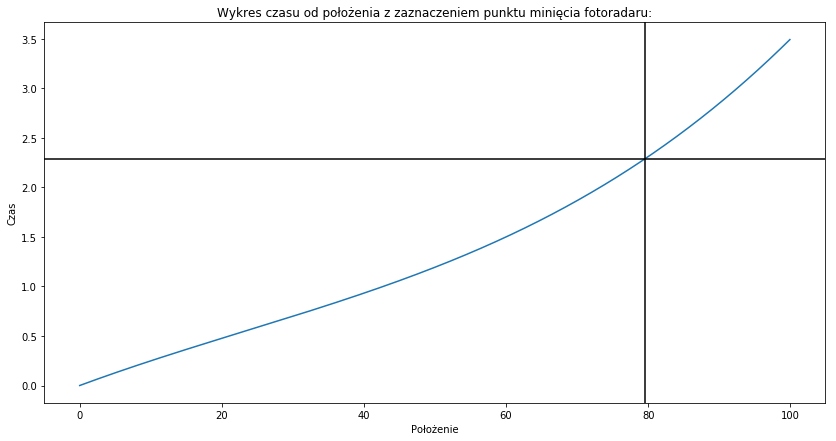

In [245]:
czas = [x for x in range(0, 4)]
polozenie = [0.0, 42.7, 73.2, 92.5]

V2 = lagrange_interpolation(polozenie, czas)

czas2 = V2(79.6)

predkosc = 79.6/czas2

x2 = arange(0, 100, 0.05)
plt.figure(figsize=(14,7))
plt.plot(x2, V2(x2))
plt.title('Wykres czasu od położenia z zaznaczeniem punktu minięcia fotoradaru:')
plt.xlabel('Położenie')
plt.ylabel('Czas')
plt.axhline(czas2, color='black')
plt.axvline(79.6, color='black')
plt.show()

In [246]:
print("V(t) = {0} m/s\nCzas minięcia fotoradaru = {1} s".format(predkosc, czas2))

V(t) = 34.734114751773625 m/s
Czas minięcia fotoradaru = 2.2916950833167666 s
